# Neural Network

## Linear Regression

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

### Generate Data

In [3]:
x_data = torch.Tensor([1, 2, 3, 4, 5])
y_data = torch.Tensor([2, 4, 6, 8, 10])

x = x_data.view(5, 1)
y = y_data.view(5, 1)

print("x :", x)
print("y :", y)

x : tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.]])
y : tensor([[ 2.],
        [ 4.],
        [ 6.],
        [ 8.],
        [10.]])


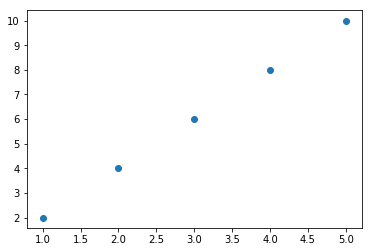

In [4]:
plt.scatter(x.numpy(), y.numpy())
plt.show()

### Derive Normal Equation

In [5]:
xtx = torch.mm(x.t(),x)
xtx_inv = xtx.inverse()
xtx_inv_xt = torch.mm(xtx_inv, x.t())

In [6]:
w = torch.mm(xtx_inv_xt, y)
w.item()

1.9999998807907104

### Define Model with Grad, nn.loss

In [7]:
w = torch.rand(1,1)
w.item()

0.09425246715545654

In [8]:
w*x

tensor([[0.0943],
        [0.1885],
        [0.2828],
        [0.3770],
        [0.4713]])

### Training

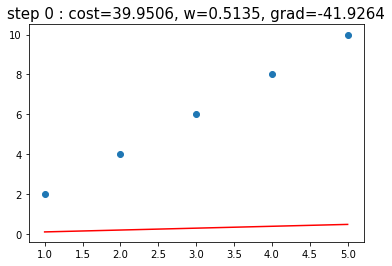

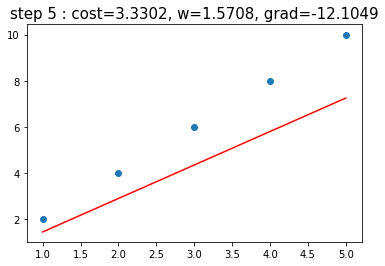

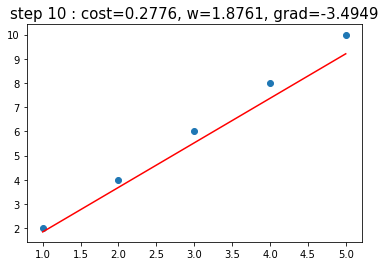

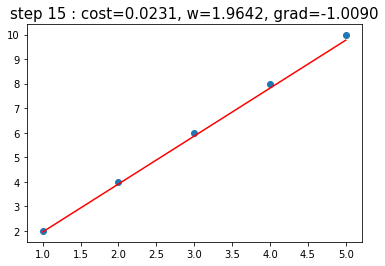

In [9]:
lr = 0.01

for step in range(20):
    pre = w*x
    cost = ((pre - y) ** 2).sum() / len(x)
    #(wx-y)^2 미분 시 2(wx-y)*x
    grad = 2*(pre-y).view(5).dot(x.view(5))/len(x)
    w -= lr*grad
    
    if step % 5 == 0 :
        plt.scatter(x.numpy(), y.numpy())
        plt.plot(x.numpy(), pre.numpy(), 'r-')
        # w.size() = 1*1, grad.size() = 1
        plt.title('step %d : cost=%.4f, w=%.4f, grad=%.4f' % (step, cost.item(), w.item(), grad.item()), fontdict={'size':15})
        plt.show()


In [10]:
x_new = torch.Tensor([6])
y_new = w*x_new
y_new.item()

11.920547485351562

### Define Model with nn.Linear, Optimizer

In [11]:
model = nn.Linear(1, 1, bias = False)
model.weight

Parameter containing:
tensor([[0.2008]], requires_grad=True)

In [12]:
loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

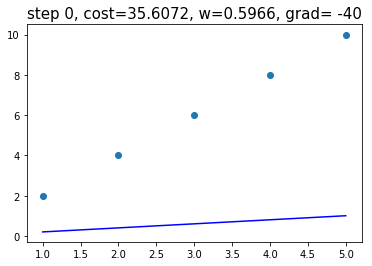

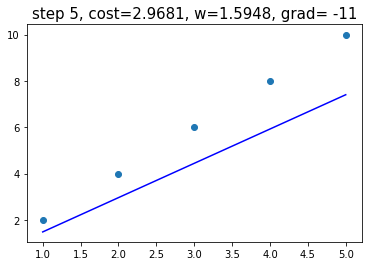

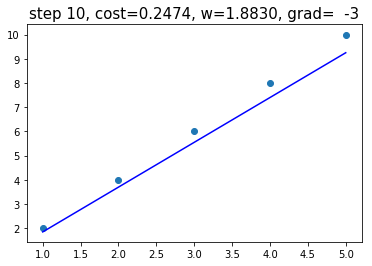

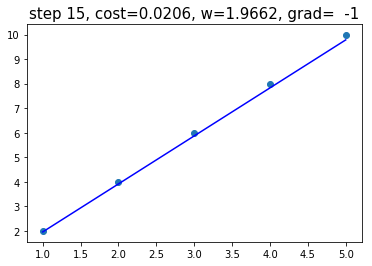

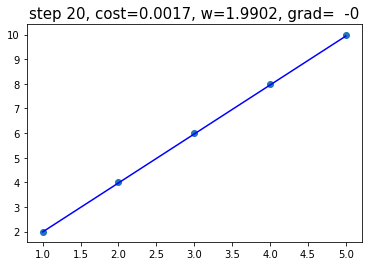

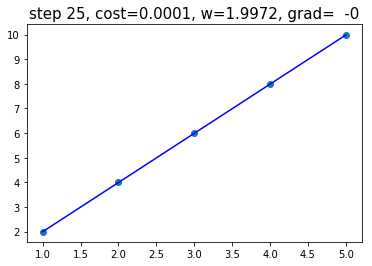

In [13]:
for step in range(30):
    pre = model(x)
    cost = loss(pre, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if step % 5 == 0:
        plt.scatter(x.numpy(), y.numpy())
        # grad를 가진 tensor는 numpy()를 바로 사용할 수 없음
        # RuntimeError: Can't call numpy() on Variable that requires grad.
        plt.plot(x.numpy(), pre.data.numpy(), 'b-')
        plt.title('step %d, cost=%.4f, w=%.4f, grad=%4.f' 
                  % (step, cost.item() ,model.weight.item(), model.weight.grad.item()), fontdict={'size':15})
        plt.show()

In [14]:
x_new = torch.Tensor([6])
y_new = model(x_new)
y_new.item()

11.99374771118164

### Problem #1

In [3]:
X = torch.rand(100, 20)
Y = torch.rand(100, 1)

In [4]:
model = nn.Linear(?, ?)
model(X.view(?)).shape == Y.shape

SyntaxError: invalid syntax (<ipython-input-4-724b3d6a45fe>, line 1)

### Problem #2

In [5]:
X = torch.rand(500, 30)
Y = torch.rand(500, 2)

In [6]:
model = nn.Linear(?, ?)
model(X.view(?)).shape == Y.shape

SyntaxError: invalid syntax (<ipython-input-6-724b3d6a45fe>, line 1)

### Problem #3

In [7]:
X = torch.rand(500, 40)
Y = torch.rand(1000, 1)

In [8]:
model = nn.Linear(?, ?)
model(X.view(?)).shape == Y.shape

SyntaxError: invalid syntax (<ipython-input-8-724b3d6a45fe>, line 1)

### Problem #4

In [9]:
X = torch.rand(1000, 200, 20)
Y = torch.rand(1000, 2)

In [10]:
model = nn.Linear(?, ?)
model(X.view(?)).shape == Y.shape

SyntaxError: invalid syntax (<ipython-input-10-724b3d6a45fe>, line 1)

## Activation Functions

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

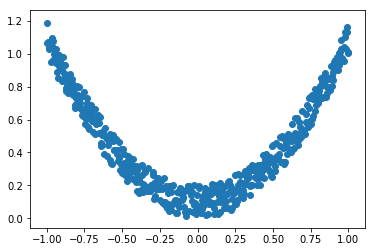

In [3]:
x = torch.linspace(-1, 1, 500)
y = x.pow(2) + 0.2*torch.rand(x.size())

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [4]:
x.shape, y.shape

(torch.Size([500]), torch.Size([500]))

In [5]:
x = torch.unsqueeze(x, dim=1)
y = torch.unsqueeze(y, dim=1)

In [6]:
x.shape, y.shape

(torch.Size([500, 1]), torch.Size([500, 1]))

### Define & Train Linear Model

In [7]:
hidden = nn.Linear(1, 20, bias=True)
output = nn.Linear(20, 1, bias=True)

In [8]:
model = nn.Sequential(hidden, output)

In [9]:
loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

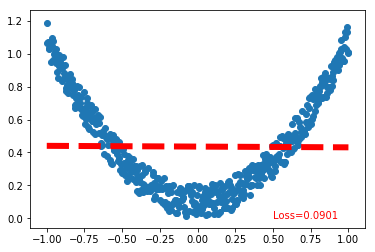

In [10]:
for step in range(500):
    pre = model(x)
    cost = loss(pre, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), pre.data.numpy(), 'r--', lw=6)
plt.text(0.5, 0, 'Loss=%.4f' % cost.item(), fontdict={'size':10, 'color':'red'})
plt.show()

### Define & Train NonLinear Model

In [11]:
hidden = nn.Linear(1, 20, bias=True)
activation = nn.ReLU()
output = nn.Linear(20, 1, bias=True)

In [12]:
model = nn.Sequential(hidden, activation, output)

In [13]:
loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

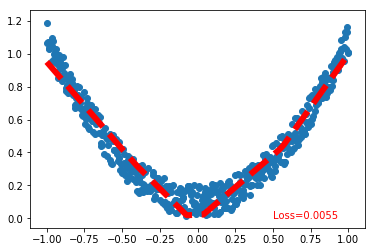

In [14]:
for step in range(500):
    pre = model(x)
    cost = loss(pre, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), pre.data.numpy(), 'r--', lw=6)
plt.text(0.5, 0, 'Loss=%.4f' % cost.item(), fontdict={'size':10, 'color':'red'})
plt.show()